In [126]:
# import libraries
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from scipy.cluster import hierarchy
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

%matplotlib inline

In [127]:
# reading in data
df = pd.read_csv('shopping_data.csv')
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [128]:
# checking for non-null value count and data types of variables/column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [129]:
# checking for unique genre types
print(df['Genre'].unique())

['Male' 'Female']


In [130]:
# Encoding Genre variable
df['Genre'] = pd.get_dummies(df['Genre'])

In [131]:
# standardization of data
sc = StandardScaler()
df_std = sc.fit_transform(df)

In [132]:
# converting standardized data into pandas dataframe
df_std = pd.DataFrame(df_std)
df_std.columns = df.columns

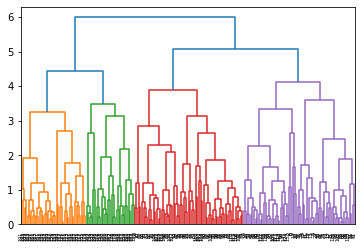

In [133]:
# generate clusters after dropping 'CustomerID variable'
cluster_model = hierarchy.linkage(df_std.drop('CustomerID', axis=1), "complete")
hierarchy.dendrogram(cluster_model);

In [134]:
# obtaining labels from cluster model for standardized dataset
cluster_labels = hierarchy.fcluster(cluster_model,4.5,criterion = 'distance')
df_std['labels'] = cluster_labels
df_std.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),labels
0,-1.723412,-1.128152,-1.424569,-1.738999,-0.434801,3
1,-1.706091,-1.128152,-1.281035,-1.738999,1.195704,3
2,-1.688771,0.886405,-1.352802,-1.700830,-1.715913,3
3,-1.671450,0.886405,-1.137502,-1.700830,1.040418,3
4,-1.654129,0.886405,-0.563369,-1.662660,-0.395980,3


In [135]:
# adding labels back to original dataset
df['labels'] = cluster_labels
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),labels
0,1,0,19,15,39,3
1,2,0,21,15,81,3
2,3,1,20,16,6,3
3,4,1,23,16,77,3
4,5,1,31,17,40,3


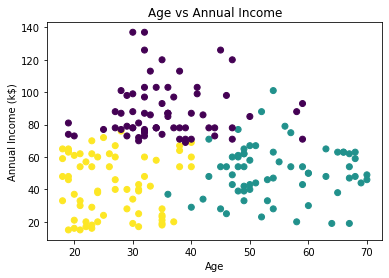

In [136]:
# investigating customer segmentation for age vs annual income
plt.scatter(df['Age'],df['Annual Income (k$)'],c = df['labels'])
plt.xlabel('Age')
plt.ylabel('Annual Income (k$)')
plt.title('Age vs Annual Income')
plt.show()

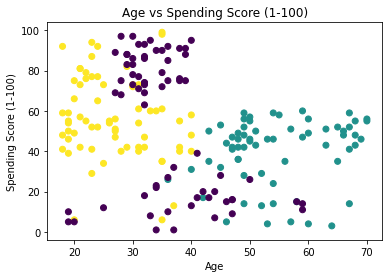

In [137]:
# investigating customer segmentation for age vs spending score
plt.scatter(df['Age'],df['Spending Score (1-100)'],c = df['labels'])
plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')
plt.title('Age vs Spending Score (1-100)')
plt.show()

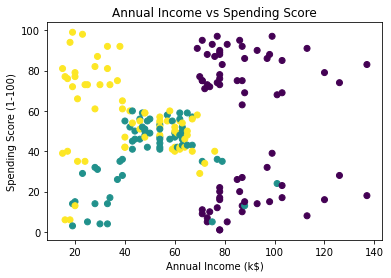

In [138]:
# investigating customer segmentation for Annual Income vs spending score
plt.scatter(df['Annual Income (k$)'],df['Spending Score (1-100)'],c = df['labels'])
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Annual Income vs Spending Score')
plt.show()